## Proyecto Individual 3 

Leonardo Cueto 

# EDA

Descarga de librerías necesarias para el programa 

In [291]:

import pandas as pd
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Descarga del dataset incluído en la página del proyecto, más DatosTrimestralesNacionale, Dataframe que junta otros datos

In [292]:
# descarga de data necesaria para realizar el trabajo 

AccesoInternetFijoVelocidadBajadaProvincia =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesoInternetFijoVelocidadBajadaProvincia.csv')
AccesosaInternetFijoTecnologiaLocalidad =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesosaInternetFijoTecnologiaLocalidad.csv')
AccesosaInternetFijoVelocidadBajadaProvincia =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesosaInternetFijoVelocidadBajadaProvincia.csv')
AccesosaInternetFijoVelocidaddeBajadaLocalidad =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesosaInternetFijoVelocidaddeBajadaLocalidad.csv')
AccesosBandaAnchaAngosta =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesosBandaAnchaAngosta.csv')
AccesosBandaAnchaAngostaProvincia =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesosBandaAnchaAngostaProvincia.csv')
AccesosInternetFijoTecnologiaProvincia =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesosInternetFijoTecnologiaProvincia.csv')
AccesosInternetFijoTecnologiaTrimestral =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesosInternetFijoTecnologiaTrimestral.csv')
AccesosInternetFijoVelocidad =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\AccesosInternetFijoVelocidad.csv')
ConectividadalServiciodeInternet =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\ConectividadalServiciodeInternet.csv')
IngresosInternetFIjoTrimestral =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\IngresosInternetFIjoTrimestral.csv')
ListadoLocalidadesconConectividadaInternet =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\ListadoLocalidadesconConectividadaInternet.csv')
PenetracionInternetFijo100H =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\PenetracionInternetFijo100H.csv')
PenetracionInternetFijoNacH =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\PenetracionInternetFijoNacH.csv')
VelocidadMediaBajadaInternetFijo =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\VelocidadMediaBajadaInternetFijo.csv')
VelocidadMediaBajadaInternetFijoProvincia =pd.read_csv('D:\HENRY\PI03\Datasets\datasetIni\VelocidadMediaBajadaInternetFijoProvincia.csv')
DatosTrimestralesNacionales =pd.read_csv('D:\HENRY\PI03\Datasets\Data\DatosTrimestralesNacionales.csv')

Imprimo los datos para darme una primer idea

In [293]:
dataset = (AccesoInternetFijoVelocidadBajadaProvincia,AccesosaInternetFijoTecnologiaLocalidad,AccesosaInternetFijoVelocidadBajadaProvincia,
            AccesosaInternetFijoVelocidaddeBajadaLocalidad,AccesosBandaAnchaAngosta,AccesosBandaAnchaAngostaProvincia,
            AccesosInternetFijoTecnologiaProvincia,AccesosInternetFijoTecnologiaTrimestral,AccesosInternetFijoVelocidad,
            ConectividadalServiciodeInternet,IngresosInternetFIjoTrimestral,ListadoLocalidadesconConectividadaInternet,
            PenetracionInternetFijo100H,PenetracionInternetFijoNacH,VelocidadMediaBajadaInternetFijo,
            VelocidadMediaBajadaInternetFijoProvincia)
# Numero de Dataframes incluidos = 16 
for i,_ in enumerate(dataset): 
    if i == 1:
        break
    else:
        print('Tabla no ',i,':\n ',(_.head(2)))

Tabla no  0 :
      Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2022          2     Buenos Aires          30.639               28.323   
1  2022          2  Capital Federal         517.000                5.980   

  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           295.238             307.554              273.954   
1            36.036              72.434               55.372   

   + 20 Mbps - 30 Mbps  + 30 Mbps    OTROS      Total  
0              129.869  3.535.757   65.849  4.667.183  
1               31.571  1.229.254  105.607  1.536.771  


Considero que las siguientes tablas no son reelevantes para lo que queremos hacer, por lo que las dejamos de lado:


AccesosaInternetFijoVelocidadBajadaProvincia


AccesosaInternetFijoVelocidaddeBajadaLocalidad


AccesosInternetFijoTecnologiaProvincia

Posteriormente normalizo un poco los datos

In [294]:
datasetsporlimpiar = (AccesosInternetFijoVelocidad,AccesosInternetFijoTecnologiaTrimestral,
                        VelocidadMediaBajadaInternetFijo,PenetracionInternetFijoNacH,AccesosBandaAnchaAngosta,
                        IngresosInternetFIjoTrimestral,ConectividadalServiciodeInternet)

IngresosInternetFIjoTrimestral.rename(columns = {'Ingresos (miles de pesos)': 'Ingresos'},inplace = True)
PenetracionInternetFijoNacH.rename(columns = {'Accesos por cada 100 hogares': 'AccesosC100Hom',
                                'Accesos por cada 100 hab': 'AccesosC100Hab'},inplace = True)
VelocidadMediaBajadaInternetFijo.rename(columns = {'Mbps (Media de bajada)': 'MediaBajada'},inplace = True)
AccesosInternetFijoTecnologiaTrimestral.rename(columns = {'Fibra óptica': 'FibraOptica'},inplace = True)
AccesosInternetFijoTecnologiaTrimestral.rename(columns = {'Total': 'TotalIngresosInternet'},inplace = True)
AccesosBandaAnchaAngosta.rename(columns = {'Dial up': 'DialUp',
                                    'Banda ancha fija':'BanchaAnchaFija',
                                    'Total':'TotalAccesosBanda'},inplace = True)

In [295]:
def deleteadorDeColumnas(data = pd.DataFrame):
    """Esta función recibe como parámetro un DataFrame y elimina las columnas:
    'director','country','date_added','rating','description'
     """

    if (type(data)== pd.DataFrame):
        cadenaTitulos = ('Unnamed: 11','Periodo','Trimestre.1','Latitud','Longitud','Poblacion')
        data1 = data
        # Este for se encarga de dropear todas las columnas que haya dentro de la lista cadenaTitulos
        for numero,columna in enumerate(cadenaTitulos):
            if columna in data1.columns:
                data1.drop(labels = columna, axis  =1, inplace = True)
        return data1
    else: 
        print('El tipo de dato debe ser DataFrame')


# se manda llamar a la función deleteadorDeColumnas para cada uno de los DataFrames
for i,e in enumerate(datasetsporlimpiar):
    e = deleteadorDeColumnas(e)


Se genera motor y se mandan los datos a MySQL, decido mandarlos para poder verlos con mayor detenimiento y amplitud

In [296]:
# En esta sección se crea un motor para poder compartir la base de datos a SQL 
url_object = URL.create(
    drivername = "mysql+pymysql",
    username="root",
    password="Leonardo1",  
    host="127.0.0.1",
    port = "3306",
    database="pi03"
)
engine = create_engine(url_object, encoding = 'latin-1')

In [89]:
AccesosInternetFijoVelocidad.to_sql('AccesosInternetFijoVelocidad',con=engine,index=False, if_exists='replace') 
AccesoInternetFijoVelocidadBajadaProvincia.to_sql('AccesoInternetFijoVelocidadBajadaProvincia',con=engine,index=False, if_exists='replace') 
AccesosInternetFijoTecnologiaTrimestral.to_sql('AccesosInternetFijoTecnologiaTrimestral',con=engine,index=False, if_exists='replace') 
AccesosInternetFijoTecnologiaProvincia.to_sql('AccesosInternetFijoTecnologiaProvincia',con=engine,index=False, if_exists='replace') 
VelocidadMediaBajadaInternetFijo.to_sql('VelocidadMediaBajadaInternetFijo',con=engine,index=False, if_exists='replace') 
VelocidadMediaBajadaInternetFijoProvincia.to_sql('VelocidadMediaBajadaInternetFijoProvincia',con=engine,index=False, if_exists='replace') 
PenetracionInternetFijoNacH.to_sql('Pe#netracionInternetFijoNacH',con=engine,index=False, if_exists='replace') 
PenetracionInternetFijo100H.to_sql('PenetracionInternetFijo100H',con=engine,index=False, if_exists='replace') 
IngresosInternetFIjoTrimestral.to_sql('IngresosInternetFIjoTrimestral',con=engine,index=False, if_exists='replace') 
AccesosBandaAnchaAngosta.to_sql('AccesosBandaAnchaAngosta',con=engine,index=False, if_exists='replace') 
AccesosBandaAnchaAngostaProvincia.to_sql('AccesosBandaAnchaAngostaProvincia',con=engine,index=False, if_exists='replace') 
ConectividadalServiciodeInternet.to_sql('ConectividadalServiciodeInternet',con=engine,index=False, if_exists='replace') 
ListadoLocalidadesconConectividadaInternet.to_sql('ListadoLocalidadesconConectividadaInternet',con=engine,index=False, if_exists='replace')

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'AccesosInternetFijoVelocidad' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'AccesoInternetFijoVelocidadBajadaProvincia' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:1666:

4312

En MySQL generé tabla de DatosTrimestralesNacionales, posteriormente la guarde y cambie los tipos de dato de algunas columnas

In [301]:
# Se ocupó esta parte del programa para cambiar los tipos de datos y poder guardar cipoias de las tablas, decido dejarlo así para que se note el trabajo hecho ya que si lo elimino posiblemente causaría un poco de confusión sobre en qué momento cambiaron los datos
"""
DatosTrimestralesNacionales['Ingresos'] = DatosTrimestralesNacionales['Ingresos'].str.replace(".", "",n=2)
DatosTrimestralesNacionales['Ingresos'] = round((pd.to_numeric(DatosTrimestralesNacionales['Ingresos'])),0)
DatosTrimestralesNacionales['Año'] = (pd.to_numeric(DatosTrimestralesNacionales['Año']))
DatosTrimestralesNacionales['Trimestre'] = (pd.to_numeric(DatosTrimestralesNacionales['Trimestre']))
DatosTrimestralesNacionales['AccesosC100Hab'] = DatosTrimestralesNacionales['AccesosC100Hab'].str.replace(",", ".")
DatosTrimestralesNacionales['AccesosC100Hab'] = (pd.to_numeric(DatosTrimestralesNacionales['AccesosC100Hab']))
DatosTrimestralesNacionales['AccesosC100Hom'] = DatosTrimestralesNacionales['AccesosC100Hom'].str.replace(",", ".")
DatosTrimestralesNacionales['AccesosC100Hom'] = (pd.to_numeric(DatosTrimestralesNacionales['AccesosC100Hom']))
DatosTrimestralesNacionales['MediaBajada'] = DatosTrimestralesNacionales['MediaBajada'].str.replace(",", ".")
DatosTrimestralesNacionales['MediaBajada'] = (pd.to_numeric(DatosTrimestralesNacionales['MediaBajada']))
DatosTrimestralesNacionales['TotalIngresosInternet'] = DatosTrimestralesNacionales['TotalIngresosInternet'].str.replace(".", "")
DatosTrimestralesNacionales['TotalIngresosInternet'] = (pd.to_numeric(DatosTrimestralesNacionales['TotalIngresosInternet']))
DatosTrimestralesNacionales['TotalAccesosBanda'] = DatosTrimestralesNacionales['TotalAccesosBanda'].str.replace(".", "")
DatosTrimestralesNacionales['TotalAccesosBanda'] = (pd.to_numeric(DatosTrimestralesNacionales['TotalAccesosBanda']))
DatosTrimestralesNacionales.to_sql('DatosTrimestralesNacionales',con=engine,index=False, if_exists='replace')
"""
DatosTrimestralesNacionales.head(5)

,Año,Trimestre,AccesosC100Hab,AccesosC100Hom,Ingresos,MediaBajada,ADSL,Cablemodem,FibraOptica,Wireless,Otros,TotalIngresosInternet,BanchaAnchaFija,DialUp,TotalAccesosBanda
0,2022,1,23.05,73.88,56195811,55.11,1.533.240,6.073.426,2.219.533,545.814,251.996,10624009,10.611.390,12.619,10624009
1,2022,2,23.72,75.97,60942843,58.44,1.468.333,5.979.214,2.723.285,556.243,231.609,10958684,10.946.248,12.436,10958684
2,2021,1,21.13,67.95,36676371,43.11,2.175.211,5.424.782,1.362.976,434.548,250.455,9647972,9.637.956,10.016,9647972
3,2021,2,21.55,69.24,38239667,45.63,2.018.587,5.641.731,1.472.246,476.968,253.552,9863084,9.852.702,10.382,9863084
4,2021,3,21.98,70.58,42999944,48.46,1.950.631,5.826.257,1.566.048,492.415,250.190,10085541,10.075.184,10.357,10085541


Generación de algnos gráficos para poder ir notando la variación de los datos

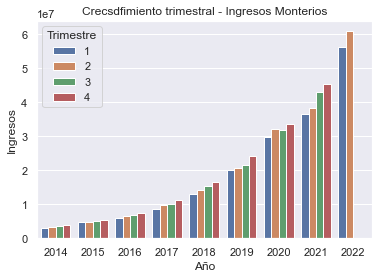

<Figure size 72x72 with 0 Axes>

In [302]:
sns.barplot(x = DatosTrimestralesNacionales.Año,y = DatosTrimestralesNacionales.Ingresos, hue =DatosTrimestralesNacionales.Trimestre )
plt.title('Crecsdfimiento trimestral - Ingresos Monterios')
plt.figure(figsize=(1,1))
plt.show()

<AxesSubplot: xlabel='Año', ylabel='MediaBajada'>

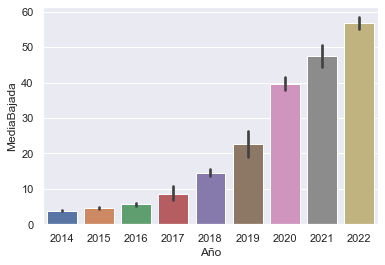

In [303]:
sns.barplot(x = DatosTrimestralesNacionales.Año,y = DatosTrimestralesNacionales.MediaBajada)

<AxesSubplot: xlabel='Año', ylabel='TotalIngresosInternet'>

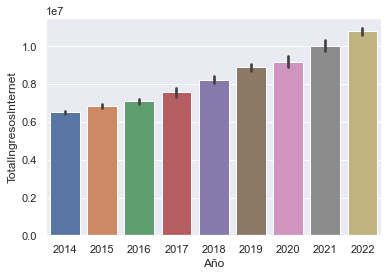

In [304]:
sns.barplot(x = DatosTrimestralesNacionales.Año,y = DatosTrimestralesNacionales.TotalIngresosInternet )

<AxesSubplot: xlabel='Año', ylabel='TotalAccesosBanda'>

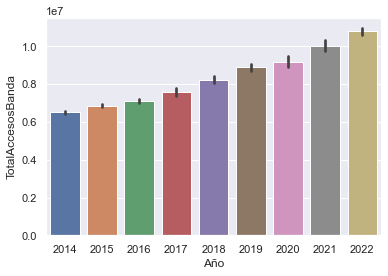

In [305]:
sns.barplot(x = DatosTrimestralesNacionales.Año,y = DatosTrimestralesNacionales.TotalAccesosBanda)

<AxesSubplot: xlabel='Año', ylabel='AccesosC100Hom'>

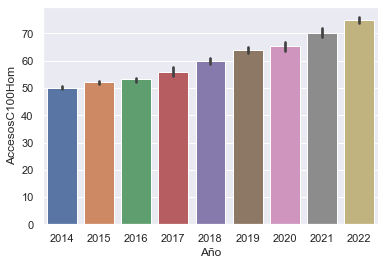

In [306]:
sns.barplot(x = DatosTrimestralesNacionales.Año,y = DatosTrimestralesNacionales.AccesosC100Hom)

<AxesSubplot: xlabel='Año', ylabel='AccesosC100Hab'>

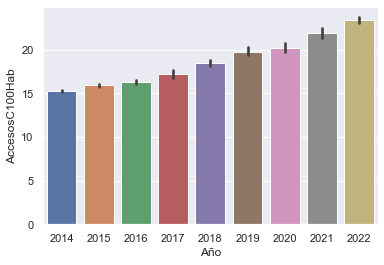

In [307]:
sns.barplot(x = DatosTrimestralesNacionales.Año,y = DatosTrimestralesNacionales.AccesosC100Hab)

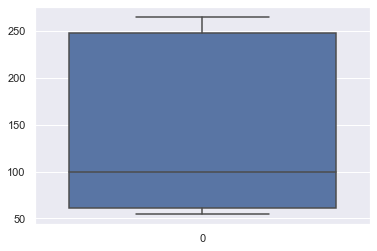

In [308]:
sns.boxplot(AccesosInternetFijoTecnologiaTrimestral.Otros)
plt.show()